In [ ]:
from google.colab import files
files.upload()

Saving applications data.csv to applications data.csv


In [ ]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
scipen = 999

In [ ]:
data = pd.read_csv("applications data.csv")

In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Exploring the shape of the data
data.shape

(1000000, 10)

In [ ]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record       1000000 non-null  int64 
 1   date         1000000 non-null  int64 
 2   ssn          1000000 non-null  int64 
 3   firstname    1000000 non-null  object
 4   lastname     1000000 non-null  object
 5   address      1000000 non-null  object
 6   zip5         1000000 non-null  int64 
 7   dob          1000000 non-null  int64 
 8   homephone    1000000 non-null  int64 
 9   fraud_label  1000000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 76.3+ MB


In [ ]:
# Before cleaning or formatting
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20170101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20170101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20170101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20170101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20170101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [ ]:
# Formating date 

data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])
# error message bc code is re-ran and has already been executed

In [ ]:
data['fraud_label'] = data['fraud_label'].astype(int)

# **After Formatting**

In [ ]:
# After cleaning or formatting
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [ ]:
data.tail(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
999990,999991,2017-12-31,311934855,UZEEJUUAE,SXZXJRJT,3667 SEEMZ PL,12921,19240719,2209569257,0
999991,999992,2017-12-31,836715951,RZTMRMJAT,RJSASESA,3139 SZJAT BLVD,56999,19070626,9999999999,0
999992,999993,2017-12-31,138005271,EATERRSTR,UZJTXTS,6332 RRAUR RD,23960,19490607,7559317028,0
999993,999994,2017-12-31,66352989,EXURTTMUT,URMMJMXE,3724 UXASM BLVD,43552,19340123,5161204838,0
999994,999995,2017-12-31,26797401,XEJMESRU,UTATSZUX,2397 SXZEX DR,54964,19360313,6114170353,0
999995,999996,2017-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2017-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2017-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2017-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0
999999,1000000,2017-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905,0


In [ ]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [ ]:
# Finding if there is missing value in the dataset
data.isna().sum()

record         0
date           0
ssn            0
firstname      0
lastname       0
address        0
zip5           0
dob            0
homephone      0
fraud_label    0
dtype: int64

In [ ]:
## Verifying Extreme Values in DOB
#data.loc[data['dob']== 20161031]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  int64         
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  int64         
 7   dob          1000000 non-null  int64         
 8   homephone    1000000 non-null  int64         
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 76.3+ MB


In [ ]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [ ]:
# Could also do sum if == 1
data['fraud_label'].sum()

14393

In [ ]:
# Creating a variable to store number of good and bad records
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [ ]:
# Creating a variable to store number of records
numrecords = len(data)
print(numrecords)

1000000


In [ ]:
print(len(goods))

985607


In [ ]:
print(len(bads))

14393


In [ ]:
print('There is', round(len(goods)/len(data)*100,2), '% of good cases labeled in this dataset.')
print('There is', round(len(bads)/len(data)*100,2), '% of bad cases labeled in this dataset.')

There is 98.56 % of good cases labeled in this dataset.
There is 1.44 % of bad cases labeled in this dataset.


In [ ]:
# To find unique values of each records
print(len(data['record'].unique()))
print(len(data['ssn'].unique()))
print(len(data['firstname'].unique()))
print(len(data['lastname'].unique()))
print(len(data['address'].unique()))
print(len(data['zip5'].unique()))
print(len(data['homephone'].unique()))
print(len(data['fraud_label'].unique()))

1000000
835819
78136
177001
828774
26370
28244
2


In [ ]:
# To find most common value of each records
# print(data['record'].mode())
print(data['ssn'].mode())
print(data['firstname'].mode())
print(data['lastname'].mode())
print(data['address'].mode())
print(data['zip5'].mode())
print(data['homephone'].mode())
print(data['fraud_label'].mode())

0    999999999
dtype: int64
0    EAMSTRMT
dtype: object
0    ERJSAXA
dtype: object
0    123 MAIN ST
dtype: object
0    68138
dtype: int64
0    9999999999
dtype: int64
0    0
dtype: int64


In [ ]:
# Percentage populated for records - To verify if there is any record number missing
len(data['record']) * 100 / numrecords

100.0

In [ ]:
# Percentage populated for date - To verify if there is any date missing
len(data['date']) * 100 / numrecords

100.0

In [ ]:
# To see if there are any missing dates
len(data['date'].unique())

365

# **Date & Records**

In [ ]:
# Grouped data by how many records in a day
count_day = data.groupby('date').count()
count_day

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2017-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2017-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2017-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2017-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2017-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
...,...,...,...,...,...,...,...,...,...
2017-12-27,2718,2718,2718,2718,2718,2718,2718,2718,2718
2017-12-28,2832,2832,2832,2832,2832,2832,2832,2832,2832
2017-12-29,2767,2767,2767,2767,2767,2767,2767,2767,2767


In [ ]:
# Grouping by months
data['date'] = pd.to_datetime(data['date'],format='%Y%m%d')
count_months = data.groupby(pd.Grouper(key='date',freq='M')).count()

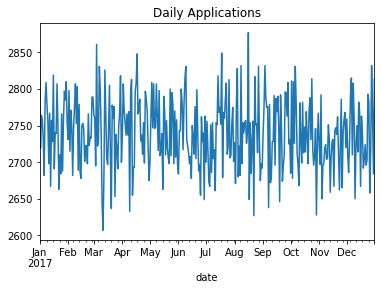

In [ ]:
# Count the number of daily applications and plot it as a time series
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Applications')

Text(0.5, 1.0, 'Month-on-Month Trend of Daily Applications')

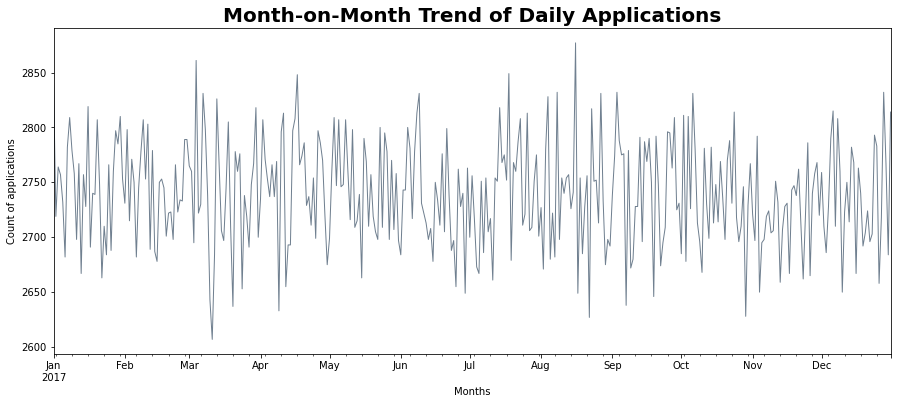

In [ ]:
# Plotting adjusted graph ver 1
daily_count.plot(figsize = (15, 6), 
                 title = 'Daily Applications',
                 color = 'slategrey', linewidth = 1,
                 ylabel = 'Count of applications',
                 xlabel = 'Months')

plt.title("Month-on-Month Trend of Daily Applications", fontsize = 20, fontweight = 'bold')

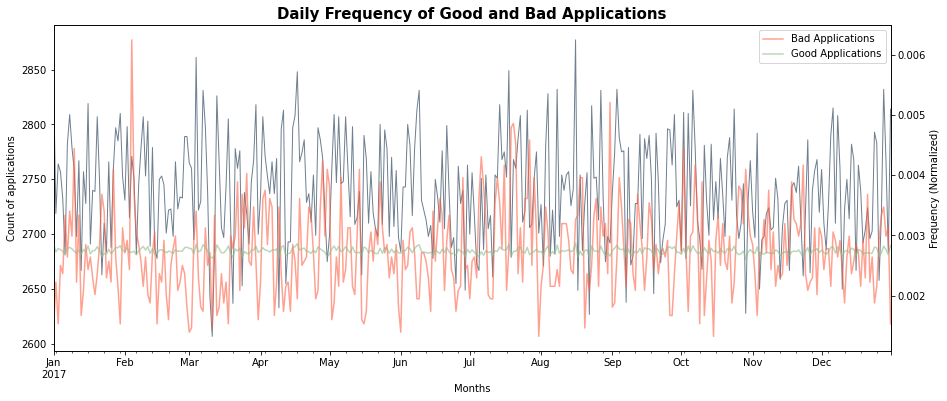

In [ ]:
# Combining all in one - too complicated 

# Overall Applications
fig, ax1 = plt.subplots(figsize = (15, 6))
daily_count.plot(ax=ax1, color = 'slategrey', linewidth = 1, label = 'Overall Applications')
ax1.set_ylabel('Count of applications')
ax1.set_xlabel('Months')

# Normalized Good and Bad Application 
ax2 = ax1.twinx()

# Plotting bad series 
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(ax=ax2, color = 'tomato', alpha = 0.6, label = 'Bad Applications')

# Plotting good series
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(ax=ax2, color = 'darkseagreen', alpha = 0.6, label = 'Good Applications')
ax2.set_ylabel('Frequency (Normalized)')

plt.title("Daily Frequency of Good and Bad Applications", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 10)
plt.show()

# **SSN**

In [ ]:
# To find how many percent of ssn records are populated
len(data['ssn']) * 100 / numrecords

100.0

In [ ]:
# To find unique values for SSN records
len(data['ssn'].unique())

835819

In [ ]:
# To group SSN and find count of each
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
571979227        1
154696808        1
962389432        1
746697518        1
361232148        1
Name: ssn, Length: 835819, dtype: int64

In [ ]:
# Storing ssn_grouped into a variable
ssn_grouped = data['ssn'].value_counts().head(20)

Text(0.5, 1.0, 'Most Common Value of SSN')

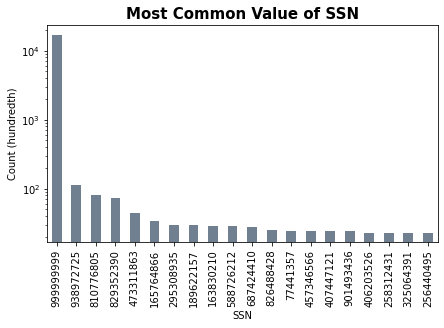

In [ ]:
ssn_grouped.plot(kind='bar',logy=True, 
                 figsize = (7, 4),
                 color = 'slategrey',
                 ylabel = 'Count (hundredth)',
                 xlabel = 'SSN')

plt.title("Most Common Value of SSN", fontsize = 15, fontweight = 'bold')

# **D.O.B**

In [ ]:
#Grouping datas into year
data['dob'] = pd.to_datetime(data['dob'],format='%Y%m%d')

# Sorted by DOB
count_years = data.groupby(pd.Grouper(key='dob',freq='Y')).count()
count_years

,record,date,ssn,firstname,lastname,address,zip5,homephone,fraud_label
dob,,,,,,,,,
1900-12-31,7195,7195,7195,7195,7195,7195,7195,7195,7195
1901-12-31,7343,7343,7343,7343,7343,7343,7343,7343,7343
1902-12-31,7484,7484,7484,7484,7484,7484,7484,7484,7484
1903-12-31,7237,7237,7237,7237,7237,7237,7237,7237,7237
1904-12-31,7537,7537,7537,7537,7537,7537,7537,7537,7537
...,...,...,...,...,...,...,...,...,...
2012-12-31,7328,7328,7328,7328,7328,7328,7328,7328,7328
2013-12-31,7450,7450,7450,7450,7450,7450,7450,7450,7450
2014-12-31,7277,7277,7277,7277,7277,7277,7277,7277,7277


In [ ]:
years_grouped = count_years.sort_values(by = ['record'], ascending=False)
years_grouped.head()

,record,date,ssn,firstname,lastname,address,zip5,homephone,fraud_label
dob,,,,,,,,,
1907-12-31,133986,133986,133986,133986,133986,133986,133986,133986,133986
1964-12-31,12254,12254,12254,12254,12254,12254,12254,12254,12254
1976-12-31,11152,11152,11152,11152,11152,11152,11152,11152,11152
1988-12-31,8664,8664,8664,8664,8664,8664,8664,8664,8664
1974-12-31,8385,8385,8385,8385,8385,8385,8385,8385,8385


Text(0.5, 1.0, "Number of Applications by Applicant's Birth Year")

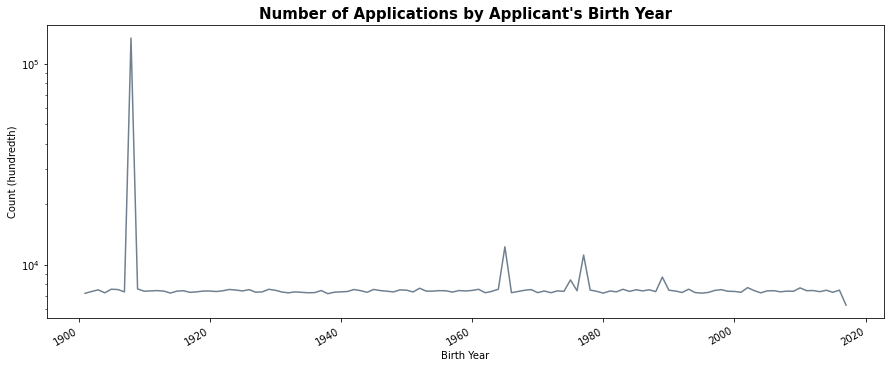

In [ ]:
years_grouped['record'].plot(kind='line',logy=True, 
                 figsize = (15, 6),
                 color = 'slategrey',
                 ylabel = 'Count (hundredth)',
                 xlabel = 'Birth Year')

plt.title("Number of Applications by Applicant's Birth Year", fontsize = 15, fontweight = 'bold')

In [ ]:
len(data['dob'].unique())

42673

In [ ]:
data['dob'].value_counts()

1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
               ...  
1928-07-30         5
1986-03-13         5
1919-02-23         5
1944-11-27         5
1996-09-04         5
Name: dob, Length: 42673, dtype: int64

In [ ]:
# dob_grouped = data['dob'].value_counts().head(20)
# dob_grouped

Text(0.5, 1.0, 'Most Common Value of Date of Birth (DOB)')

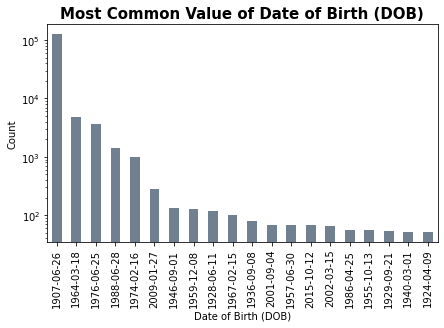

In [ ]:
data['dob_month_year'] = data['dob'].dt.to_period('D')
dob_grouped = data['dob_month_year'].value_counts()

dob_grouped.head(20).plot(kind='bar',logy=True,
                          figsize = (7, 4), 
                          color = 'slategrey', 
                          ylabel = 'Count', 
                          xlabel = 'Date of Birth (DOB)')

plt.title("Most Common Value of Date of Birth (DOB)", fontsize = 15, fontweight = 'bold')

# **First name**

In [ ]:
# Finding amount of unique first names
len(data['firstname'].unique())

78136

In [ ]:
# Grouping first names and finding the count
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
TUSSMZJA         1
SSAZJXSRM        1
UATETTATJ        1
UASJMZXZJ        1
RUZUJJRMX        1
Name: firstname, Length: 78136, dtype: int64

In [ ]:
# Storing values in a variable to call in plot later
fn_grouped = data['firstname'].value_counts().head(20)
fn_grouped

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
EASEXMJAT     7576
SSSXUEJMS     6923
SZUASTTA      6878
EREMTZXXA     6717
EAXRRUMUX     5686
USSZMRERM     5511
MJJJZUZTE     5294
MAUJMJTU      5022
RSZXMZRSU     5006
MEERZUXXU     4966
EZTERXZRA     4716
RTMMTSZRZ     4618
UXZUMTRTR     4600
UXJAUZRMM     4580
MSRUAREMU     4145
Name: firstname, dtype: int64

Text(0.5, 1.0, 'Most Common Value of First Name')

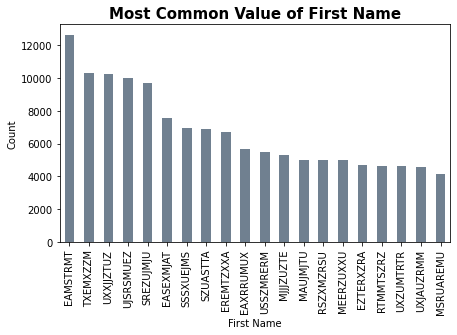

In [ ]:
#data['firstname'].value_counts().head(20).plot(kind='bar')

fn_grouped.plot(kind='bar', 
                 figsize = (7, 4),
                 color = 'slategrey',
                 ylabel = 'Count',
                 xlabel = 'First Name')

plt.title("Most Common Value of First Name", fontsize = 15, fontweight = 'bold')

# **Last Name**

In [ ]:
# Finding amount of unique last names
len(data['lastname'].unique())

177001

In [ ]:
# Grouping last names and finding the count
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
RMJZJRMJ       1
SSUTSMUM       1
EXASZEXS       1
UERZXTTR       1
RMJZURRS       1
Name: lastname, Length: 177001, dtype: int64

In [ ]:
# Storing values in a variable to call in plot later
ln_grouped = data['lastname'].value_counts().head(20)
ln_grouped

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
SXZXJRJT    4340
EUSEZRAE    4173
USMATTUR    4036
ETERUXME    3762
RJURSTXJ    3575
RTZRTZAS    3559
SRTRERMJ    3259
RMRXAMX     3074
RJRARJJU    3048
SUERZXAT    3026
EUXRMR      2757
STXAAZZM    2594
ETAJXSRE    2584
EASASTEM    2535
SMTTZJJX    2527
Name: lastname, dtype: int64

Text(0.5, 1.0, 'Most Common Value of Last Name')

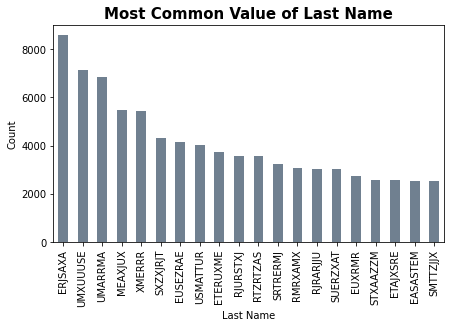

In [ ]:
#data['lastname'].value_counts().head(20).plot(kind='bar')

ln_grouped.plot(kind='bar', 
                 figsize = (7, 4),
                 color = 'slategrey',
                 ylabel = 'Count',
                 xlabel = 'Last Name')

plt.title("Most Common Value of Last Name", fontsize = 15, fontweight = 'bold')

# **Address**

In [ ]:
# Finding amount of unique address
len(data['address'].unique())

828774

In [ ]:
data['address'].value_counts()

123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
                   ... 
1179 RATUS BLVD       1
8006 SSRJM ST         1
6327 MAXR ST          1
4937 ESAMR LN         1
3408 UZZAM WY         1
Name: address, Length: 828774, dtype: int64

In [ ]:
# Storing values in a variable to call in plot later
add_grouped = data['address'].value_counts().head(20)
add_grouped

123 MAIN ST       1079
1775 XJXE LN        97
7433 RAEZA ST       80
8911 MZSU DR        74
4907 RRAAU DR       73
426 XUAXZ BLVD      57
3545 ARMA ST        44
606 EZZAU WY        44
4530 ETSMX WY       42
4292 RUSMM LN       41
9693 ERJZA LN       40
3142 MZZE WY        36
1425 UAATX ST       35
6637 UESAX LN       35
5600 UETAR AVE      35
4479 RMEAZ PL       34
2611 AXXS CT        33
9777 RMJJU WY       32
8966 UAJER AVE      31
2026 UZJTX CT       31
Name: address, dtype: int64

Text(0.5, 1.0, 'Most Common Value of Address')

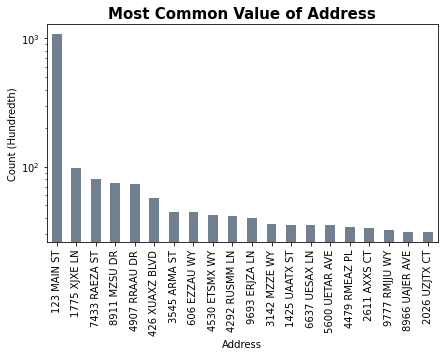

In [ ]:
#data['address'].value_counts().head(20).plot(kind='bar',logy=True)
add_grouped.plot(kind='bar', logy = True, 
                 figsize = (7, 4),
                 color = 'slategrey',
                 ylabel = 'Count (Hundredth)',
                 xlabel = 'Address')

plt.title("Most Common Value of Address", fontsize = 15, fontweight = 'bold')

# **Zip5**

In [ ]:
# Finding amount of unique zip
len(data['zip5'].unique())

26370

In [ ]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
1599       1
69474      1
51017      1
25995      1
21226      1
Name: zip5, Length: 26370, dtype: int64

In [ ]:
# Storing values in a variable to call in plot later
zip_grouped = data['zip5'].value_counts().head(20)
zip_grouped

68138    823
90042    514
89835    489
35227    478
14931    459
86500    438
12700    436
1362     434
52317    432
59695    432
14455    431
64597    431
11848    428
34031    425
84983    419
80692    408
94992    406
47208    399
94887    397
27132    397
Name: zip5, dtype: int64

Text(0.5, 1.0, 'Most Common Value of Zip')

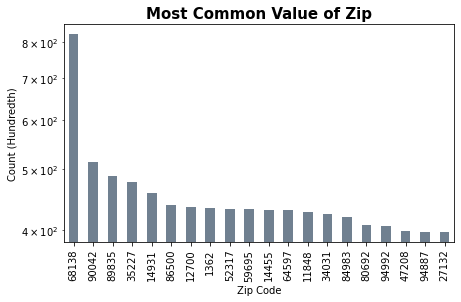

In [ ]:
#data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

zip_grouped.plot(kind='bar', logy = True, 
                 figsize = (7, 4),
                 color = 'slategrey',
                 ylabel = 'Count (Hundredth)',
                 xlabel = 'Zip Code')

plt.title("Most Common Value of Zip", fontsize = 15, fontweight = 'bold')

# **Homephone**

In [ ]:
# Finding amount of unique homephone
len(data['homephone'].unique())

28244

In [ ]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: homephone, Length: 28244, dtype: int64

In [ ]:
# Storing values in a variable to call in plot later
phone_grouped = data['homephone'].value_counts().head(20)
phone_grouped

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
2669445638      172
6637507363      169
8629049955      139
3364980740      110
6845279110      108
1324008228      108
2841944187      107
8880326532      107
8477710704      106
5014272561      106
6773573704      105
3417174496      104
6538326086      104
1133829511      103
7460887672      103
Name: homephone, dtype: int64

Text(0.5, 1.0, 'Most Common Value of Homephone')

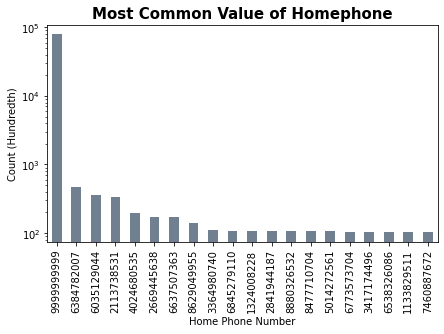

In [ ]:
#data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

phone_grouped.plot(kind='bar', logy = True, 
                 figsize = (7, 4),
                 color = 'slategrey',
                 ylabel = 'Count (Hundredth)',
                 xlabel = 'Home Phone Number')

plt.title("Most Common Value of Homephone", fontsize = 15, fontweight = 'bold')

In [ ]:
data[data['homephone'] == 6384782007].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dob_month_year
955,956,2017-01-01,839219305,XTSTSTRXZ,RJURERXZ,1393 ERXUA PL,2881,1944-10-16,6384782007,0,1944-10-16
1089,1090,2017-01-01,174602522,UXJAUZRMM,RJSESTSE,5267 EXAEU PL,73914,1968-06-05,6384782007,0,1968-06-05
1550,1551,2017-01-01,555701804,EMZSUSZUA,UTZJSRZX,1370 UXTR ST,97066,1907-06-26,6384782007,0,1907-06-26
2478,2479,2017-01-01,54298943,ERZJAXMZU,TSUEEET,4266 XMAJX AVE,6625,1907-06-26,6384782007,0,1907-06-26
5001,5002,2017-01-02,999999999,EAMSTRMT,UJMZZASU,56 EXZSM CT,47366,1907-06-26,6384782007,0,1907-06-26
5462,5463,2017-01-02,321807047,SZUASTTA,EASASTEM,6908 ERERJ WY,78763,1982-08-23,6384782007,0,1982-08-23
12962,12963,2017-01-05,467135557,UXZUMTRTR,UTJASRAJ,5323 SJTET CT,63515,2000-04-09,6384782007,0,2000-04-09
14316,14317,2017-01-06,737308489,SSJXXUUZT,EZTSXXEJ,4164 RRJAU ST,29293,1907-06-26,6384782007,0,1907-06-26
15690,15691,2017-01-06,912911963,XJZAUEZTX,EMAJTXXA,9973 TARA AVE,96286,1923-10-16,6384782007,0,1923-10-16
18075,18076,2017-01-07,575697321,RSXTZRTS,RJEARXTU,7186 EMAMU PL,44845,1905-06-28,6384782007,0,1905-06-28


# **Good and Bad Applications**

In [ ]:
# Creating a variable to store number of good and bad records
flagged = len(data[data['fraud_label'] == 0])
not_flagged = len(data[data['fraud_label'] == 1])

In [ ]:
data['fraud_label'].value_counts().head()

0    985607
1     14393
Name: fraud_label, dtype: int64

In [ ]:
print('There is', round(len(goods)/len(data)*100,2), '% of good cases labeled in this dataset.')
print('There is', round(len(bads)/len(data)*100,2), '% of bad cases labeled in this dataset.')

There is 98.56 % of good cases labeled in this dataset.
There is 1.44 % of bad cases labeled in this dataset.


Text(0.5, 1.0, 'Distribution of Fraud Labels')

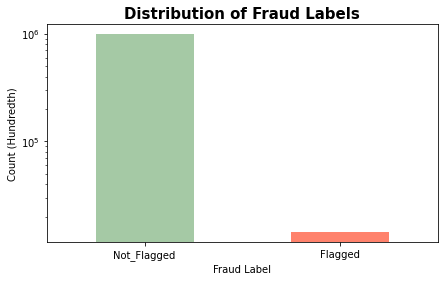

In [ ]:
data['label_str'] = data['fraud_label'].replace({0:'Not_Flagged', 1:'Flagged'})
fraud_counts = data['label_str'].value_counts()

fraud_counts.plot(kind='bar', logy = True,
                 figsize = (7, 4),
                 color = ('darkseagreen','tomato'), 
                  alpha = 0.8,
                 ylabel = 'Count (Hundredth)',
                 xlabel = 'Fraud Label')
plt.xticks(rotation=0)

plt.title("Distribution of Fraud Labels", fontsize = 15, fontweight = 'bold')

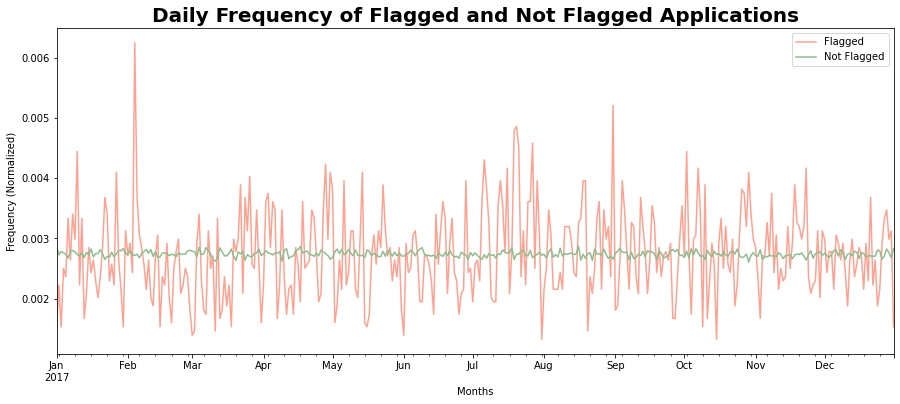

In [ ]:
# Visualizing time series/frequency of the amount of good application and bad application
# Numbers are normalized 
# good plotted in green and bad plotted in red
# y represents normalized count / relative daily frequency of applications for 'goods' and 'bads'
ngoods = len(goods)
nbads = len(bads)

# Plotting bad series 
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'tomato', alpha = 0.6, label = 'Flagged')

# Plotting good series
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(figsize = (15,6),
                       title = 'Daily Applications',
                       ylabel = 'Frequency (Normalized)',
                       xlabel = 'Months',
                       color = 'darkseagreen',
                       label = 'Not Flagged')

# Sum of graph
plt.title("Daily Frequency of Flagged and Not Flagged Applications", fontsize = 20, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 10)
plt.show()

***End of Hw 2 submitted by Joyce Xinyi Jiang, for DSO 562 Fraud Analytics - USC M.S. Business Analytics***